In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01_review.ipynb',
 '02_class(corona).ipynb',
 '03_class(test-titanic, train).ipynb',
 '2021.09.27-goal.txt',
 '20210921_00_datamerge.csv',
 'test.csv',
 'train.csv']

In [5]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train.shape, test.shape

((891, 12), (418, 11))

In [7]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.describe(include=['O']) # 범주형 데이터 값도 보여준다.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Arnold-Franchi, Mr. Josef",male,347082,G6,S
freq,1,577,7,4,644


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.groupby(['Pclass'])

In [15]:
train.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [16]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

#### 5-4 SibSp 별 생존자 구하기(groupby)

In [17]:
train.groupby(['SibSp']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,606
1,209,209,209,209,209,183,209,209,209,69,209
2,28,28,28,28,28,25,28,28,28,6,28
3,16,16,16,16,16,12,16,16,16,3,16
4,18,18,18,18,18,18,18,18,18,0,18
5,5,5,5,5,5,5,5,5,5,0,5
8,7,7,7,7,7,0,7,7,7,0,7


#### 5-4 (추가) SibSp 별 Age의 평균구하기(groupby)

In [21]:
train.groupby(['SibSp']).mean()

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


In [22]:
train.groupby(['SibSp']).mean()['Age']

SibSp
0    31.397558
1    30.089727
2    22.620000
3    13.916667
4     7.055556
5    10.200000
8          NaN
Name: Age, dtype: float64

##### 클래스 별 나이 평균

In [19]:
train.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [24]:
train.groupby(['Pclass', 'Sex', 'Embarked']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  \
Pclass Sex    Embarked                                                   
1      female C                  43        43    43   38     43     43   
              Q                   1         1     1    1      1      1   
              S                  48        48    48   44     48     48   
       male   C                  42        42    42   36     42     42   
              Q                   1         1     1    1      1      1   
              S                  79        79    79   64     79     79   
2      female C                   7         7     7    7      7      7   
              Q                   2         2     2    1      2      2   
              S                  67        67    67   66     67     67   
       male   C                  10        10    10    8     10     10   
              Q                   1         1     1    1      1      1   
              S                  97        97    97   90     97     97   
3      female C                  23        23    23   16     23     23   
              Q                  33        33    33   10     33     33   
              S                  88        88    88   76     88     88   
       male   C                  43        43    43   25     43     43   
              Q                  39        39    39   14     39     39   
              S                 265       265   265  214    265    265   

                        Ticket  Fare  Cabin  
Pclass Sex    Embarked                       
1      female C             43    43     35  
              Q              1     1      1  
              S             48    48     43  
       male   C             42    42     31  
              Q              1     1      1  
              S             79    79     63  
2      female C              7     7      1  
              Q              2     2      1  
              S             67    67      8  
       male   C             10    10      1  
              Q              1     1      0  
              S             97    97      5  
3      female C             23    23      1  
              Q             33    33      0  
              S             88    88      5  
       male   C             43    43      0  
              Q             39    39      1  
              S            265   265      5

In [26]:
train.groupby(['Pclass', 'Sex', 'Embarked', 'Parch']).count()

PassengerId  Survived  Name  Age  SibSp  Ticket  \
Pclass Sex    Embarked Parch                                                    
1      female C        0               33        33    33   28     33      33   
                       1                7         7     7    7      7       7   
                       2                3         3     3    3      3       3   
              Q        0                1         1     1    1      1       1   
              S        0               28        28    28   25     28      28   
                       1               10        10    10    9     10      10   
                       2               10        10    10   10     10      10   
       male   C        0               31        31    31   25     31      31   
                       1                8         8     8    8      8       8   
                       2                3         3     3    3      3       3   
              Q        0                1         1     1    1      1       1   
              S        0               67        67    67   52     67      67   
                       1                6         6     6    6      6       6   
                       2                5         5     5    5      5       5   
                       4                1         1     1    1      1       1   
2      female C        0                5         5     5    5      5       5   
                       2                2         2     2    2      2       2   
              Q        0                2         2     2    1      2       2   
              S        0               38        38    38   37     38      38   
                       1               18        18    18   18     18      18   
                       2                9         9     9    9      9       9   
                       3                2         2     2    2      2       2   
       male   C        0                7         7     7    5      7       7   
                       1                1         1     1    1      1       1   
                       2                2         2     2    2      2       2   
              Q        0                1         1     1    1      1       1   
              S        0               81        81    81   74     81      81   
                       1               13        13    13   13     13      13   
                       2                3         3     3    3      3       3   
3      female C        0               10        10    10    6     10      10   
                       1                8         8     8    7      8       8   
                       2                4         4     4    2      4       4   
                       3                1         1     1    1      1       1   
              Q        0               30        30    30    8     30      30   
                       1                1         1     1    1      1       1   
                       2                1         1     1    0      1       1   
                       5                1         1     1    1      1       1   
              S        0               45        45    45   40     45      45   
                       1               16        16    16   13     16      16   
                       2               20        20    20   16     20      20   
                       3                1         1     1    1      1       1   
                       4                2         2     2    2      2       2   
                       5                3         3     3    3      3       3   
                       6                1         1     1    1      1       1   
       male   C        0               37        37    37   21     37      37   
                       1                6         6     6    4      6       6   
              Q        0               34        34    34    9     34      34   
                       1                5         5     5    

In [29]:
train.groupby(['Pclass', 'Sex', 'Embarked', 'Parch'], as_index=False).count()

,Pclass,Sex,Embarked,Parch,PassengerId,Survived,Name,Age,SibSp,Ticket,Fare,Cabin
0,1,female,C,0,33,33,33,28,33,33,33,25
1,1,female,C,1,7,7,7,7,7,7,7,7
2,1,female,C,2,3,3,3,3,3,3,3,3
3,1,female,Q,0,1,1,1,1,1,1,1,1
4,1,female,S,0,28,28,28,25,28,28,28,24
5,1,female,S,1,10,10,10,9,10,10,10,9
6,1,female,S,2,10,10,10,10,10,10,10,10
7,1,male,C,0,31,31,31,25,31,31,31,21
8,1,male,C,1,8,8,8,8,8,8,8,7
9,1,male,C,2,3,3,3,3,3,3,3,3


In [40]:
# 참고. Parch : 동반한 Parent(부모) Child(자식)의 수
dat = train.groupby(['Pclass', 'Sex', 'Parch'], as_index=False).mean()
dat

,Pclass,Sex,Parch,PassengerId,Survived,Age,SibSp,Fare
0,1,female,0,445.343750,0.984375,36.285714,0.484375,95.302930
1,1,female,1,588.117647,1.000000,38.812500,0.411765,111.252206
2,1,female,2,431.230769,0.846154,22.230769,1.076923,152.703846
3,1,male,0,475.848485,0.363636,42.506410,0.262626,51.403325
4,1,male,1,320.571429,0.285714,44.071429,0.357143,119.827979
5,1,male,2,445.375000,0.625000,21.615000,0.750000,146.508325
6,1,male,4,439.000000,0.000000,64.000000,1.000000,263.000000
7,2,female,0,412.800000,0.888889,32.058140,0.333333,16.873796
8,2,female,1,521.333333,0.944444,24.666667,0.722222,27.444444
9,2,female,2,409.363636,1.000000,20.454545,0.545455,34.059855


In [41]:
dat.sort_values(by='Survived', ascending=False)

,Pclass,Sex,Parch,PassengerId,Survived,Age,SibSp,Fare
9,2,female,2,409.363636,1.000000,20.454545,0.545455,34.059855
10,2,female,3,606.500000,1.000000,39.000000,1.500000,20.875000
1,1,female,1,588.117647,1.000000,38.812500,0.411765,111.252206
0,1,female,0,445.343750,0.984375,36.285714,0.484375,95.302930
8,2,female,1,521.333333,0.944444,24.666667,0.722222,27.444444
7,2,female,0,412.800000,0.888889,32.058140,0.333333,16.873796
2,1,female,2,431.230769,0.846154,22.230769,1.076923,152.703846
5,1,male,2,445.375000,0.625000,21.615000,0.750000,146.508325
14,3,female,0,366.000000,0.588235,24.018519,0.341176,10.207652
12,2,male,1,517.571429,0.500000,18.107143,1.071429,27.821729


## 그래프로 표현하기

In [42]:
import seaborn as sns

seaborn.axisgrid.FacetGrid

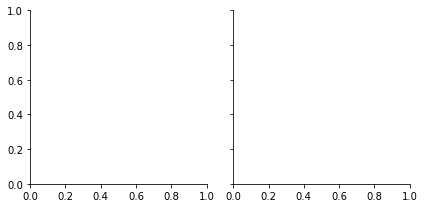

In [43]:
g = sns.FacetGrid(train, col='Survived')
type(g)

In [44]:
import matplotlib.pyplot as plt

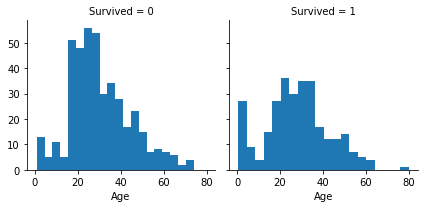

In [45]:
g.map(plt.hist, 'Age', bins=20)

### Pclass별 생존에 대해서 나이대별 분포를 살펴보자.

<Figure size 1080x1080 with 0 Axes>

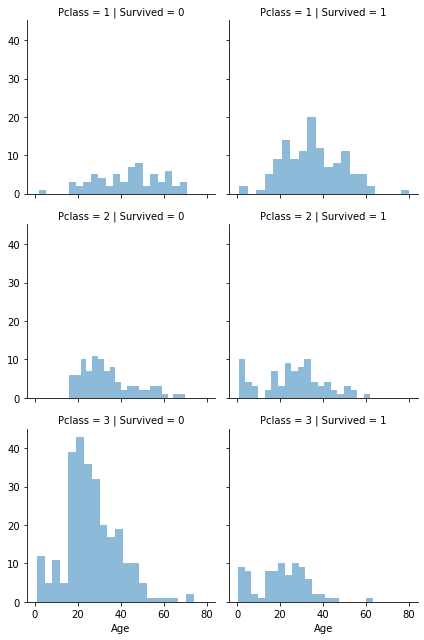

In [46]:
plt.figure(figsize=(15,15))
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)

## 데이터 전처리

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# train.drop([], axis=1) 0 : 행, 1 : 열
train_df = train.drop(['Ticket', 'Cabin'], axis=1)

In [51]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


# 최종 정리

### [].shape, [].head(), [].tail(), [].describe(), [].columns, [].info(), [].dtypes, [].isnull().sum()
### [].notnull().sum()
### [].groupby([]).sum(), [].groupby([]).mean(), [].groupby([]).count()
### pd.options.display.max_columns= 500
### 문자열 처리 
 * [].str.strip()
 * [].str.split()
 * [].str.find(), extract()..
    
### 자료형 변환
 * [].astype({"col1":"int32"})
 * dat['col1'] = dat['col1'].astype('int32')

### 데이터가 어떤 것이 있을까?
 * [데이터셋]['컬럼명'].unique()
    
### 데이터가 어떤 것이 있을까? 그리고 그것의 개수확인
 * [데이터셋]['컬럼명'].value_counts()
    
### 조건에 만족하는 행을 선택
 * [].loc[행, 열]
    * data_tmp = [].loc[ dat['col1'] > 50, :]
    * data_tmp = [][ dat['col1'] > 50]
  
### 인덱스 값을 리셋
 * tmp = [].reset_index(inplace=False)
 * df.reset_index(inplace=True)

### 값을 정렬
 * tmp = [].sort_values(by=['col1'], ascending=True)
 * tmp = [].sort_index(by=['col1'], ascending=True)